# Problemas de Reactores Químicos
## 3.1 Hayes y NMbaga

Una reacción irreversible en fase gas se lleva a cabo en un reactor intermitente isotermico. La reacción global es:

\begin{align*}
A \rightarrow 2B
\end{align*}

El reactor se llena con una mezcla de 70% mol de A y 30% mol de un gas inerte. La presión inicial es de 90 kPa y la temperatura de 400 K. La expresión de velocidad de reacción es de segundo orden, esto es:

\begin{align*}
r_A = kC_A^2
\end{align*}

Mientras que, la constante de velosidad $k = 0.75 m^3/mol h$ a 400 K. Suponga gas ideal y calcule el tiempo necesario para lograr una converción del 80% de A en un reactor por lotes a volumen constante.

Primero, se debe de establecer una estratégia de solución, en este caso se buscará la ecuación diferencial que representa al proceso, partiendo de la ecuación de diseño de un Reactor Batch

\begin{align*}
(-r_A) =  -\frac{1}{V} \frac{dN_A}{dt}
\end{align*}

Sin embargo, como el volumen de la reacción permanece constante, se pueden utlizar las siguientes expresiones equivalentes para el diseño

\begin{align*}
(-r_A) = -\frac{1}{V} \frac{d(VC_A)}{dt} = - \frac{dC_A}{dt} = C_{A0}\frac{dx_{A}}{dt}
\end{align*}

Como se busca la converción se trabajará con ella

\begin{align*}
(-r_A) = C_{A0}\frac{dx_{A}}{dt}
\end{align*}

Como ya se tiene expreción de la velocidad de reacción se puede reacomodar la ecuacion anterior para llegar a la EDO que representa este fenómeno

\begin{align*}
\frac{dx_{A}}{dt} = k C_{A0} (1-x_{A})^2
\end{align*}

Se comienza definiendo las constantes y ecuaciones del problema

In [137]:
#Constantes
P = 90 #kPa
T = 400 #K
k = 0.75/60 #m3/mol h
y = 0.7
R = 8.314e-3 #kPa m3/mol K
x_A0 = 0

#Ecuaciones
C_A0 = (P*y)/(R*T)
print(f"la concentración inicial es {C_A0:1.5} mol/m^3")

la concentración inicial es 18.944 mol/m^3


Se programa la ecuación diferencial

In [138]:
from scipy.integrate import solve_ivp
import numpy as np

def dxAdt(t,x_A):
    return k*C_A0*(1-x_A)**2

t_span = np.array([x_A0,30])
xA0 = np.array([0])

n = np.linspace(0, 0.5)

sol = solve_ivp(dxAdt, t_span, xA0)

Se grafica el resultado para observar el comportamineto de la converción

Text(0.5, 0, 'Tiempo (min)')

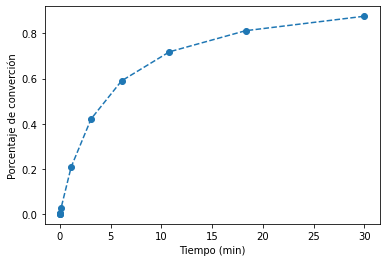

In [139]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y[0],"o--")
plt.ylabel("Porcentaje de converción")
plt.xlabel("Tiempo (min)")

La solución analítica de la ecuación diferencial es 

\begin{align*}
x_A  = 1- \frac{1}{kC_{A0} t+1}
\end{align*}

Por lo que se puede programar la solución analítica y comparar con el resultado obtenido en el solve_ivp

In [140]:
def analitica(t):
    return 1 - (1/((k*C_A0*t)+1))
analitica(0.1)

0.02313216913654581

Para que se pueda graficar la función sol.t y t tienen que tener el mismo número de elementos

In [143]:
t = np.linspace(0,30,11)
sol.t

array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 3.07365104e+00, 6.07216402e+00,
       1.07922556e+01, 1.82976019e+01, 3.00000000e+01])

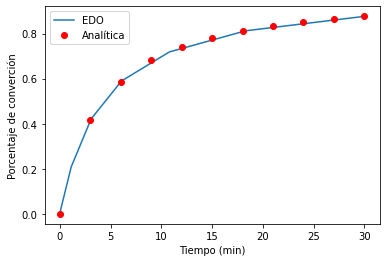

In [146]:
plt.plot(sol.t,sol.y[0], label = "EDO")
plt.plot(t,1-(1/((k*C_A0*t)+1)),"ro", label = "Analítica")
plt.ylabel("Porcentaje de converción")
plt.xlabel("Tiempo (min)")
plt.legend()